In [30]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [31]:
# loading the dataset
df = pd.read_csv('waterQuality_dataset.csv', sep=';')
df

id        date    NH4  BSK5  Suspended     O2    NO3    NO2     SO4  \
0      1  17.02.2000  0.330  2.77       12.0  12.30   9.50  0.057  154.00   
1      1  11.05.2000  0.044  3.00       51.6  14.61  17.75  0.034  352.00   
2      1  11.09.2000  0.032  2.10       24.5   9.87  13.80  0.173  416.00   
3      1  13.12.2000  0.170  2.23       35.6  12.40  17.13  0.099  275.20   
4      1  02.03.2001  0.000  3.03       48.8  14.69  10.00  0.065  281.60   
...   ..         ...    ...   ...        ...    ...    ...    ...     ...   
2856  22  06.10.2020  0.046  2.69        3.6   8.28   3.80  0.038  160.00   
2857  22  27.10.2020  0.000  1.52        0.5  11.26   0.56  0.031  147.20   
2858  22  03.12.2020  0.034  0.29        0.8  11.09   2.58  0.042  209.92   
2859  22  12.01.2021  0.000  2.10        0.0  14.31   3.94  0.034  121.60   
2860  22  10.02.2021  0.000  1.78        0.0  14.30   6.30  0.033  134.40   

        PO4       CL  
0     0.454   289.50  
1     0.090  1792.00  
2     0.200  2509.00  
3     0.377  1264.00  
4     0.134  1462.00  
...     ...      ...  
2856  0.726    77.85  
2857  0.634    71.95  
2858  0.484    61.17  
2859  0.424    63.49  
2860  0.582    66.31  

[2861 rows x 11 columns]

In [32]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [33]:
df.head(5)

id        date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
0   1  17.02.2000  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   
1   1  11.05.2000  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090   
2   1  11.09.2000  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200   
3   1  13.12.2000  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377   
4   1  02.03.2001  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   

       CL  
0   289.5  
1  1792.0  
2  2509.0  
3  1264.0  
4  1462.0

In [34]:
df.shape

(2861, 11)

In [35]:
# data statistics
df.describe()

id          NH4         BSK5    Suspended           O2  \
count  2861.000000  2858.000000  2860.000000  2845.000000  2858.000000   
mean     12.397064     0.758734     4.316182    12.931905     9.508902   
std       6.084226     2.486247     2.973997    16.543097     4.428260   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       8.000000     0.080000     2.160000     6.000000     7.092500   
50%      14.000000     0.220000     3.800000    10.000000     8.995000   
75%      16.000000     0.500000     5.800000    15.000000    11.520000   
max      22.000000    39.427000    50.900000   595.000000    90.000000   

               NO3          NO2          SO4          PO4           CL  
count  2860.000000  2858.000000  2812.000000  2833.000000  2812.000000  
mean      4.316846     0.246128    59.362313     0.418626    93.731991  
std       6.881188     2.182777    96.582641     0.771326   394.512184  
min       0.000000     0.000000     0.000000     0.000000     0.020000  
25%       1.390000     0.030000    27.052500     0.130000    26.800000  
50%       2.800000     0.059000    37.800000     0.270000    33.900000  
75%       5.582500     0.125750    64.640000     0.470000    45.607500  
max     133.400000   109.000000  3573.400000    13.879000  5615.280000

In [36]:
# checking for null values
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [37]:
# total number of null values
df.isnull().sum().sum()

np.int64(153)

In [38]:
# date is an object
# converting it to date format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

id       date    NH4  BSK5  Suspended     O2    NO3    NO2     SO4  \
0      1 2000-02-17  0.330  2.77       12.0  12.30   9.50  0.057  154.00   
1      1 2000-05-11  0.044  3.00       51.6  14.61  17.75  0.034  352.00   
2      1 2000-09-11  0.032  2.10       24.5   9.87  13.80  0.173  416.00   
3      1 2000-12-13  0.170  2.23       35.6  12.40  17.13  0.099  275.20   
4      1 2001-03-02  0.000  3.03       48.8  14.69  10.00  0.065  281.60   
...   ..        ...    ...   ...        ...    ...    ...    ...     ...   
2856  22 2020-10-06  0.046  2.69        3.6   8.28   3.80  0.038  160.00   
2857  22 2020-10-27  0.000  1.52        0.5  11.26   0.56  0.031  147.20   
2858  22 2020-12-03  0.034  0.29        0.8  11.09   2.58  0.042  209.92   
2859  22 2021-01-12  0.000  2.10        0.0  14.31   3.94  0.034  121.60   
2860  22 2021-02-10  0.000  1.78        0.0  14.30   6.30  0.033  134.40   

        PO4       CL  
0     0.454   289.50  
1     0.090  1792.00  
2     0.200  2509.00  
3     0.377  1264.00  
4     0.134  1462.00  
...     ...      ...  
2856  0.726    77.85  
2857  0.634    71.95  
2858  0.484    61.17  
2859  0.424    63.49  
2860  0.582    66.31  

[2861 rows x 11 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [40]:
df.head()

id       date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
0   1 2000-02-17  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   
1   1 2000-05-11  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090   
2   1 2000-09-11  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200   
3   1 2000-12-13  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377   
4   1 2001-03-02  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   

       CL  
0   289.5  
1  1792.0  
2  2509.0  
3  1264.0  
4  1462.0

In [41]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [42]:
# sorting by id and date
df = df.sort_values(by=['id', 'date'])
df.head()

id       date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
0   1 2000-02-17  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   
1   1 2000-05-11  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090   
2   1 2000-09-11  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200   
3   1 2000-12-13  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377   
4   1 2001-03-02  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   

       CL  
0   289.5  
1  1792.0  
2  2509.0  
3  1264.0  
4  1462.0

In [43]:
# extracting year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [44]:
df.head()

id       date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
0   1 2000-02-17  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   
1   1 2000-05-11  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090   
2   1 2000-09-11  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200   
3   1 2000-12-13  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377   
4   1 2001-03-02  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   

       CL  year  month  
0   289.5  2000      2  
1  1792.0  2000      5  
2  2509.0  2000      9  
3  1264.0  2000     12  
4  1462.0  2001      3

In [45]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [46]:
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

In [47]:
station_ids = df['id'].unique()
station_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [48]:
# plotting components over time for each station
components = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

In [50]:
n_stations = len(station_ids)
n_stations

22

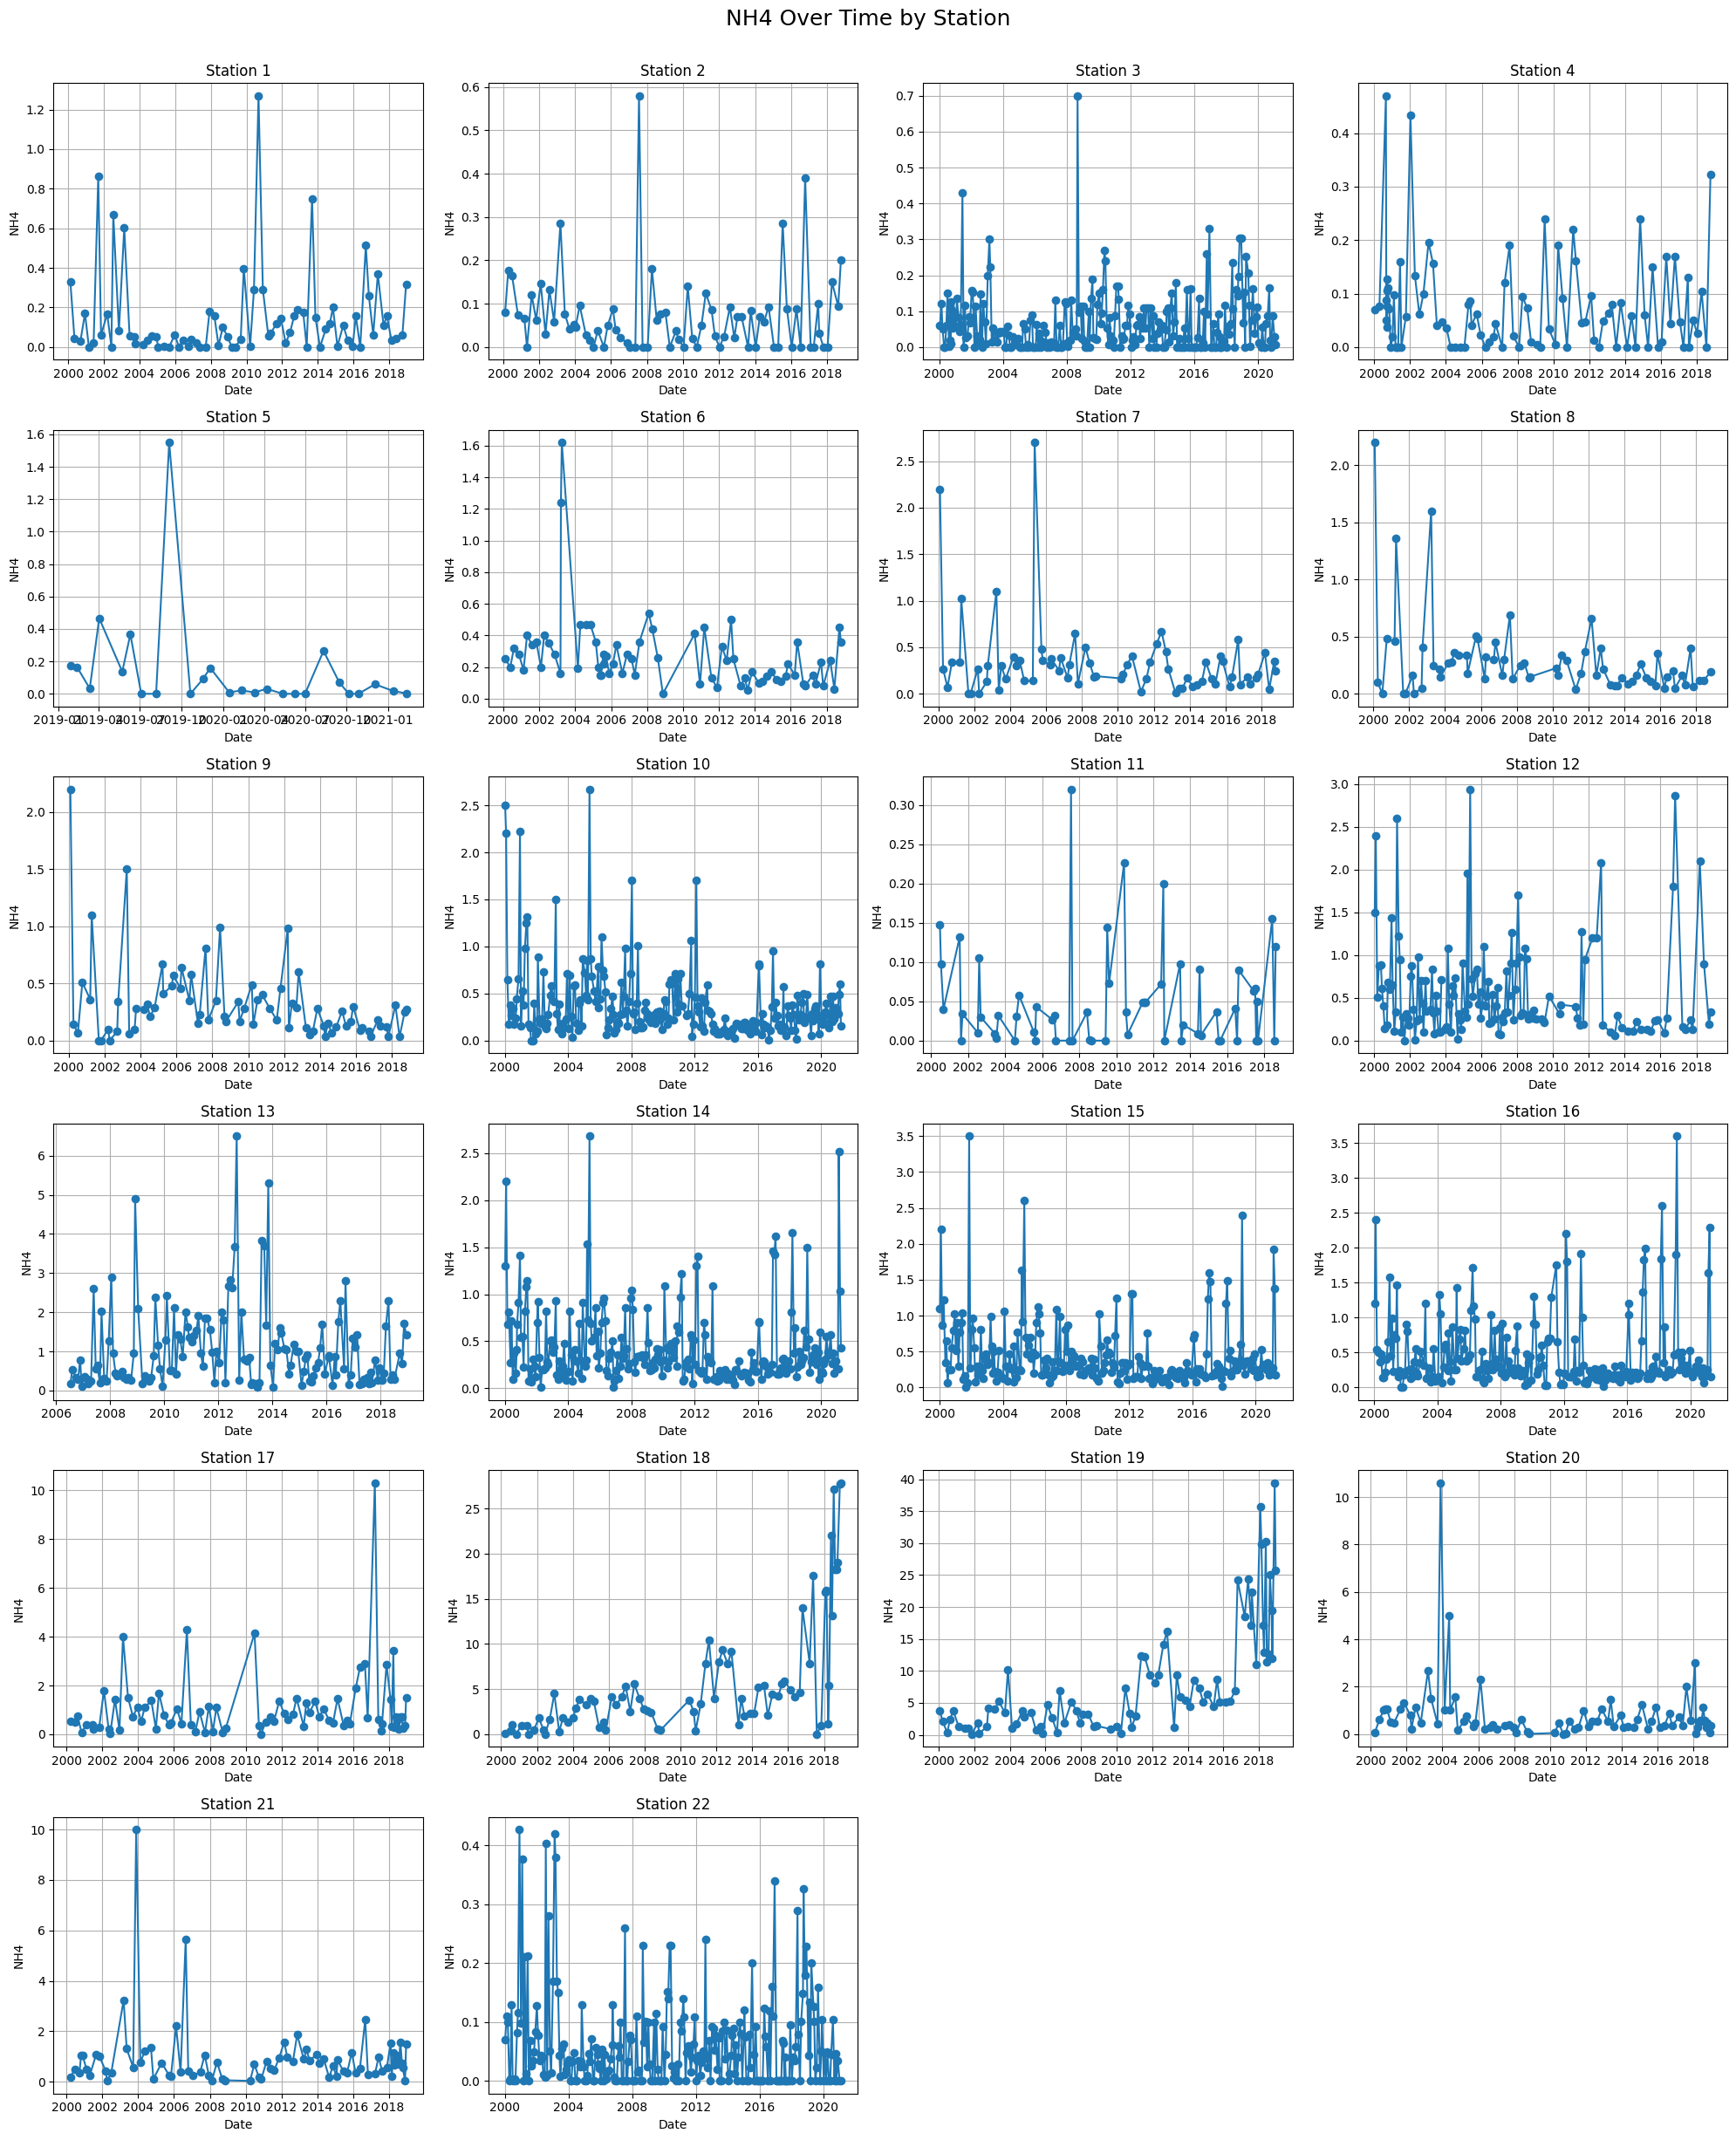

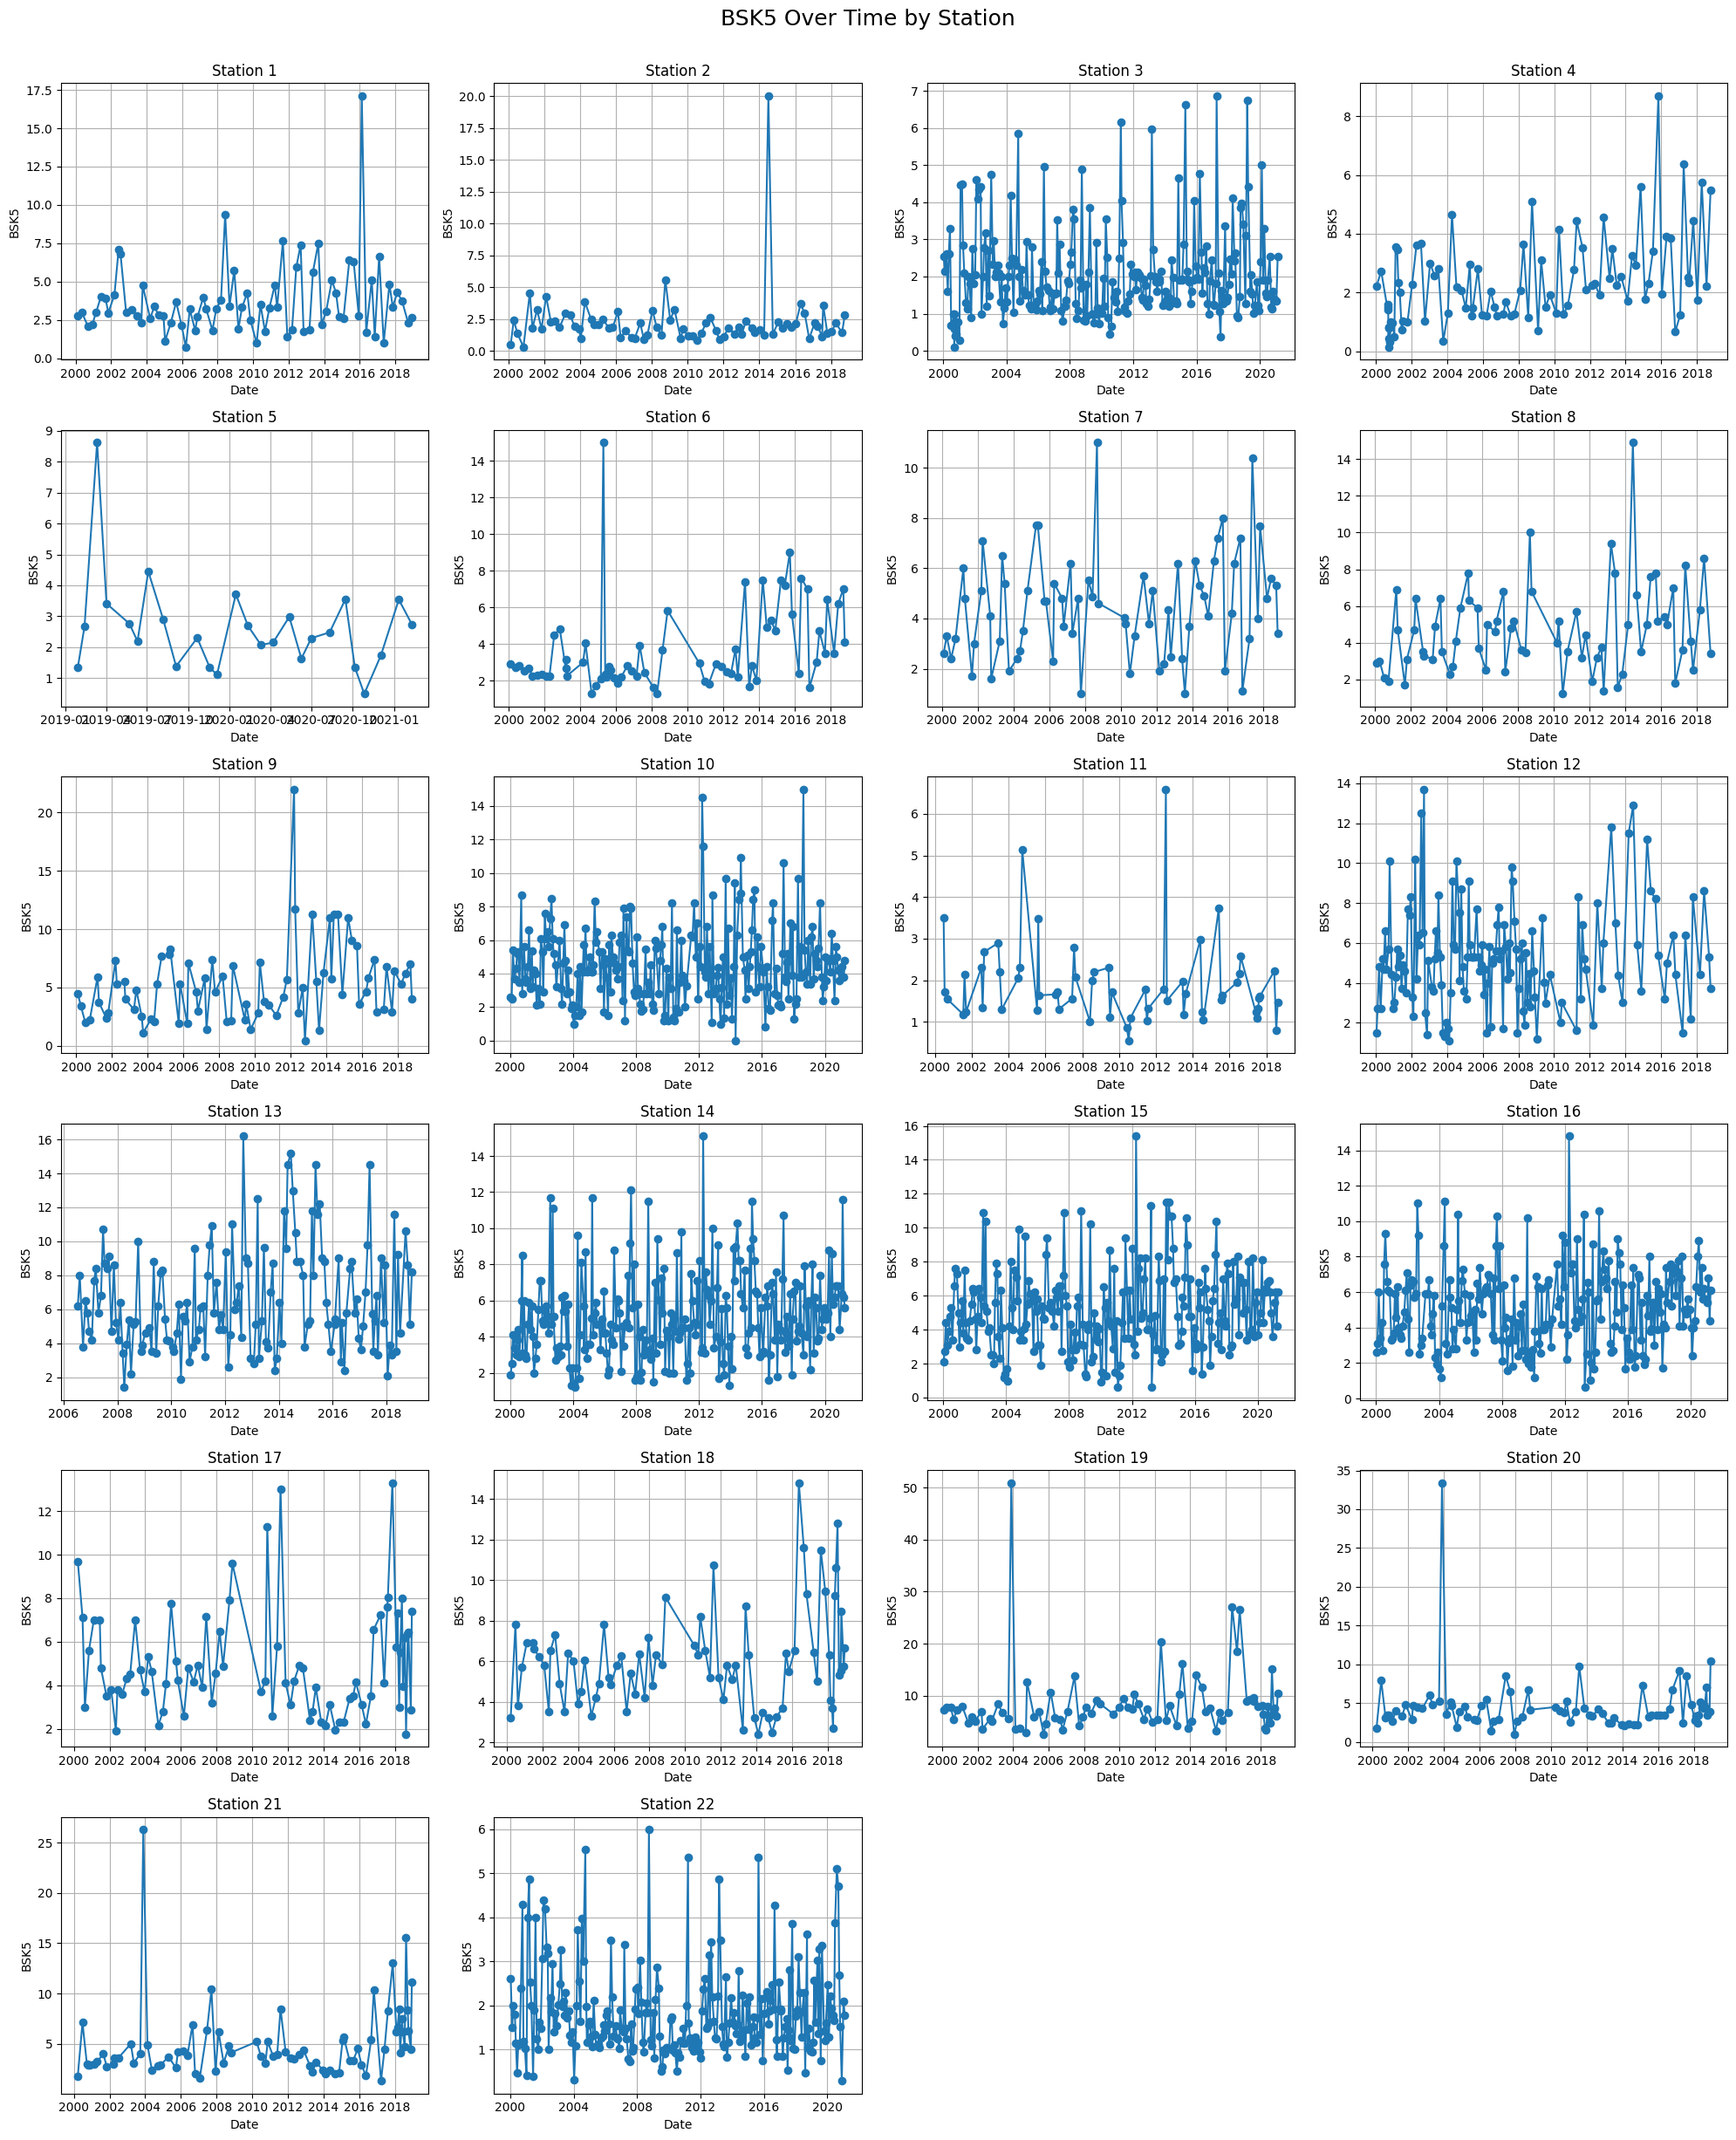

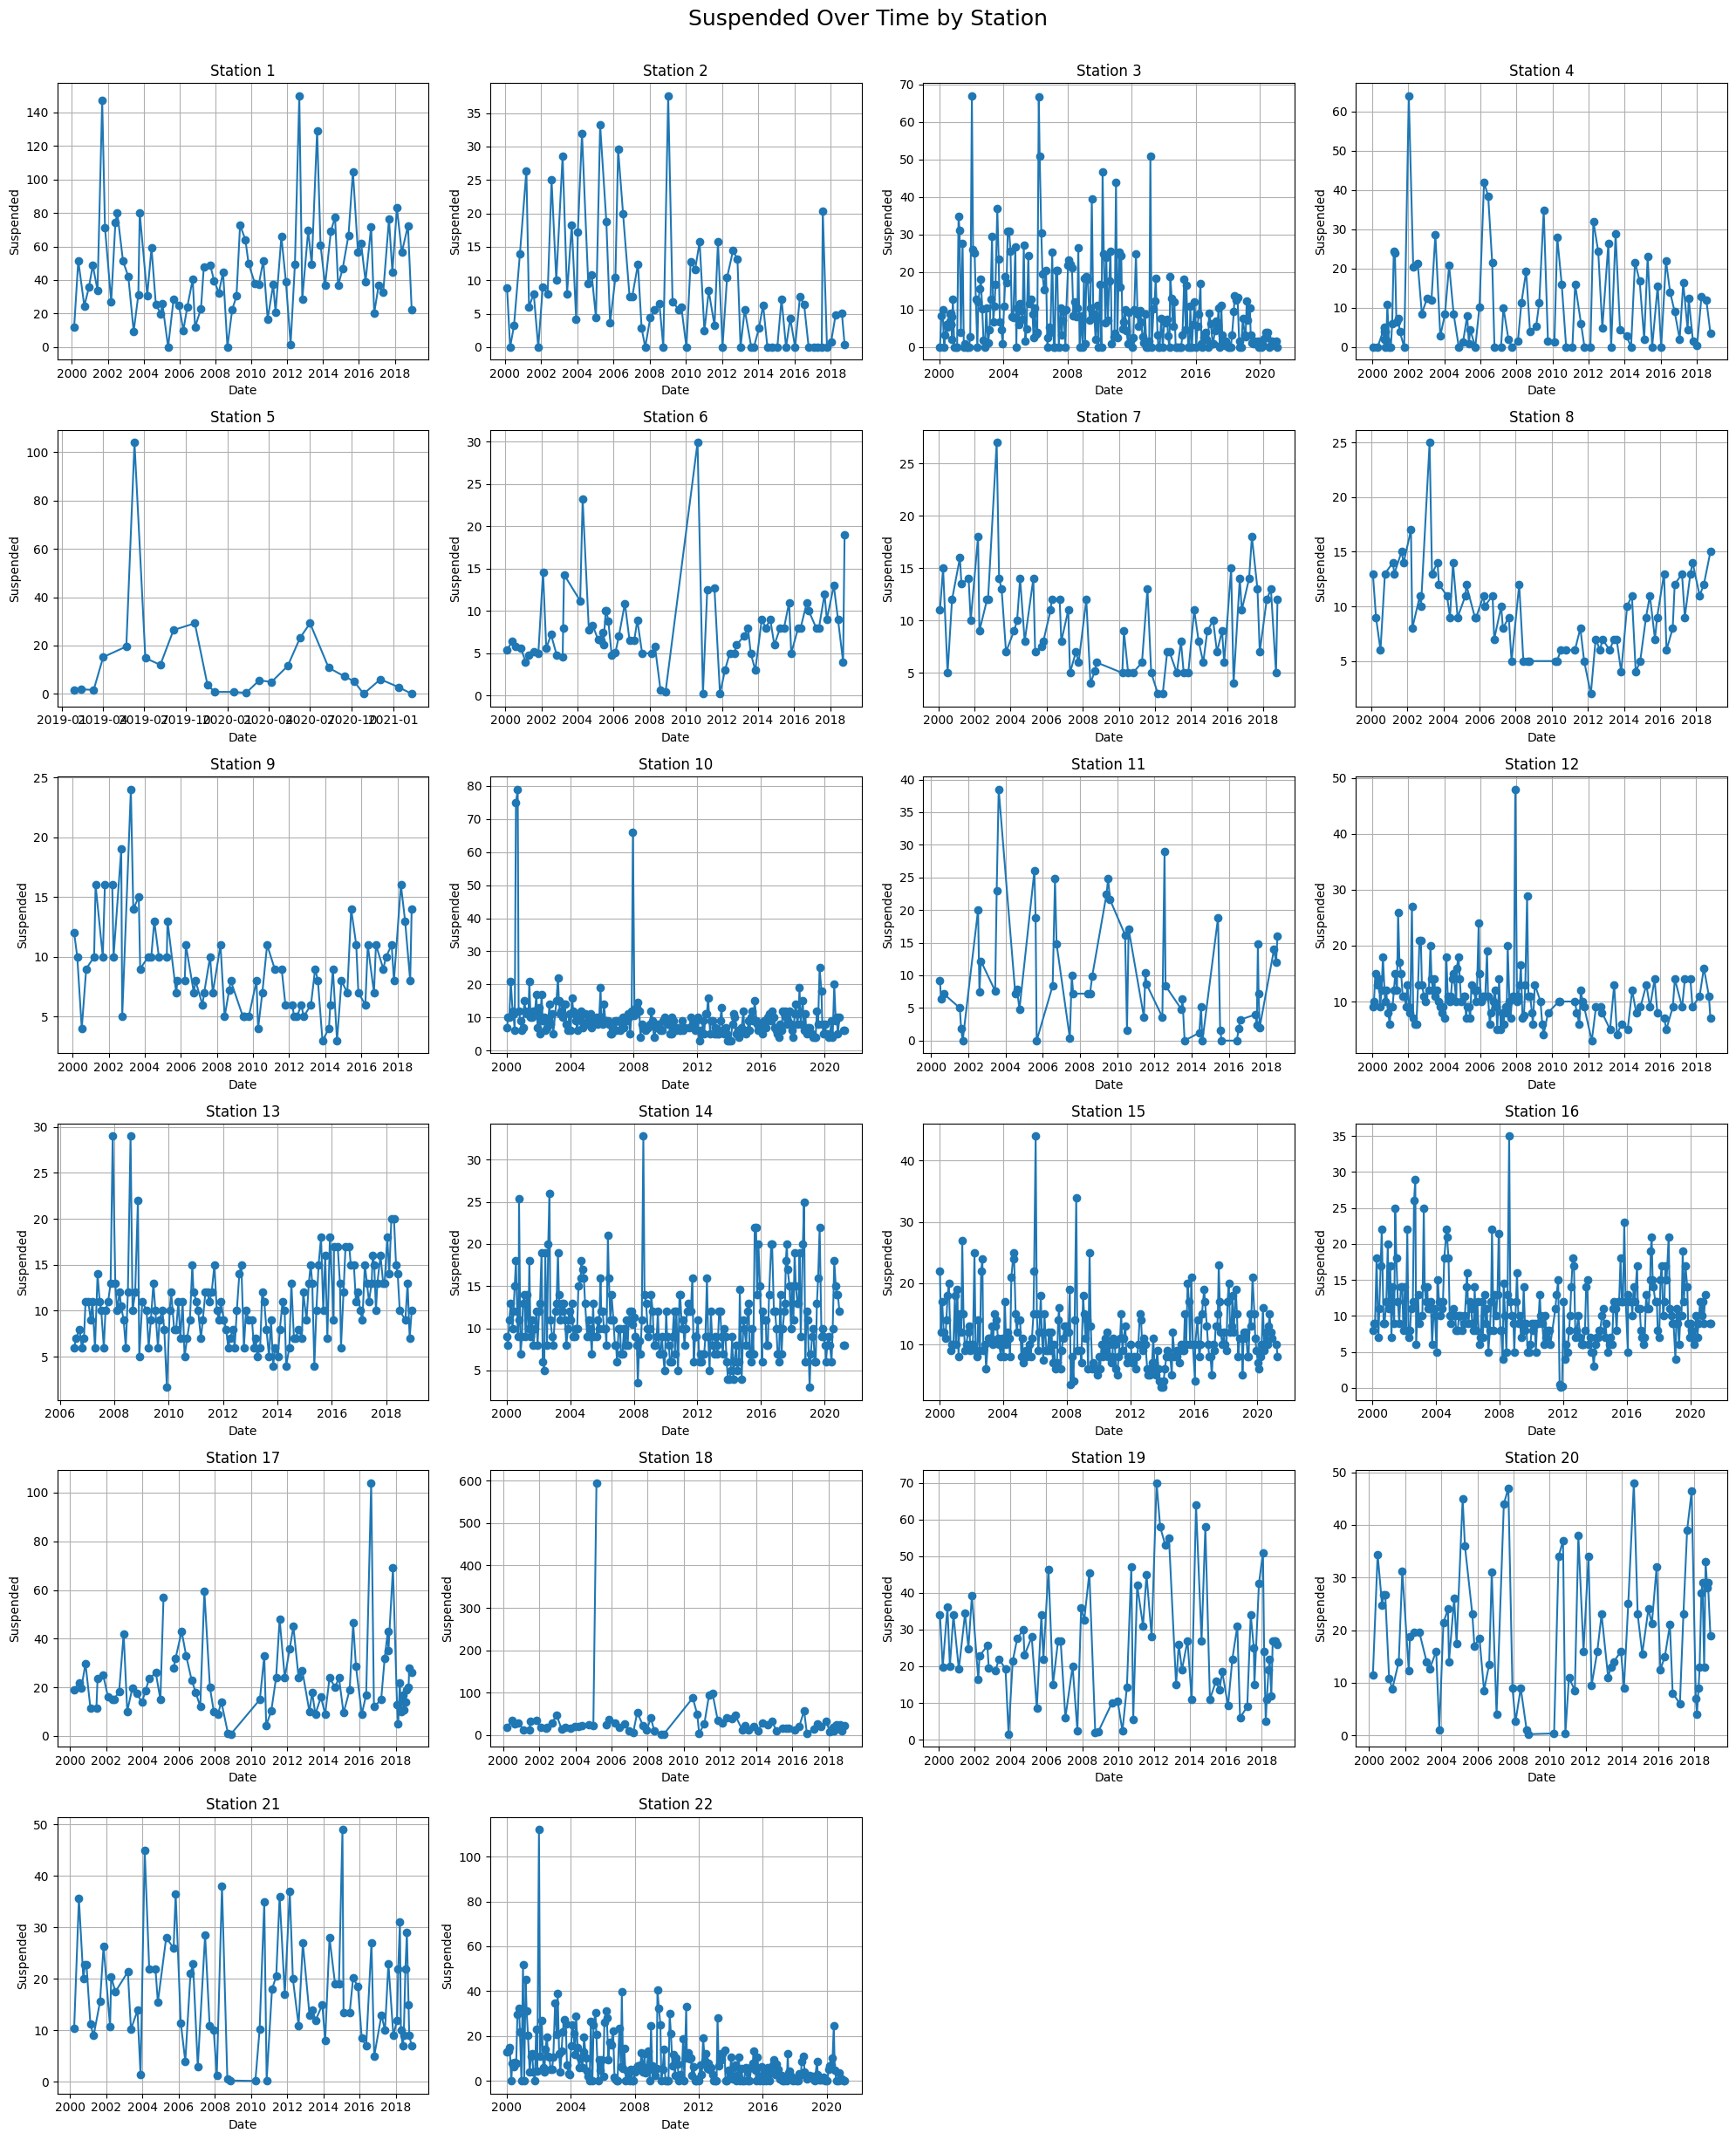

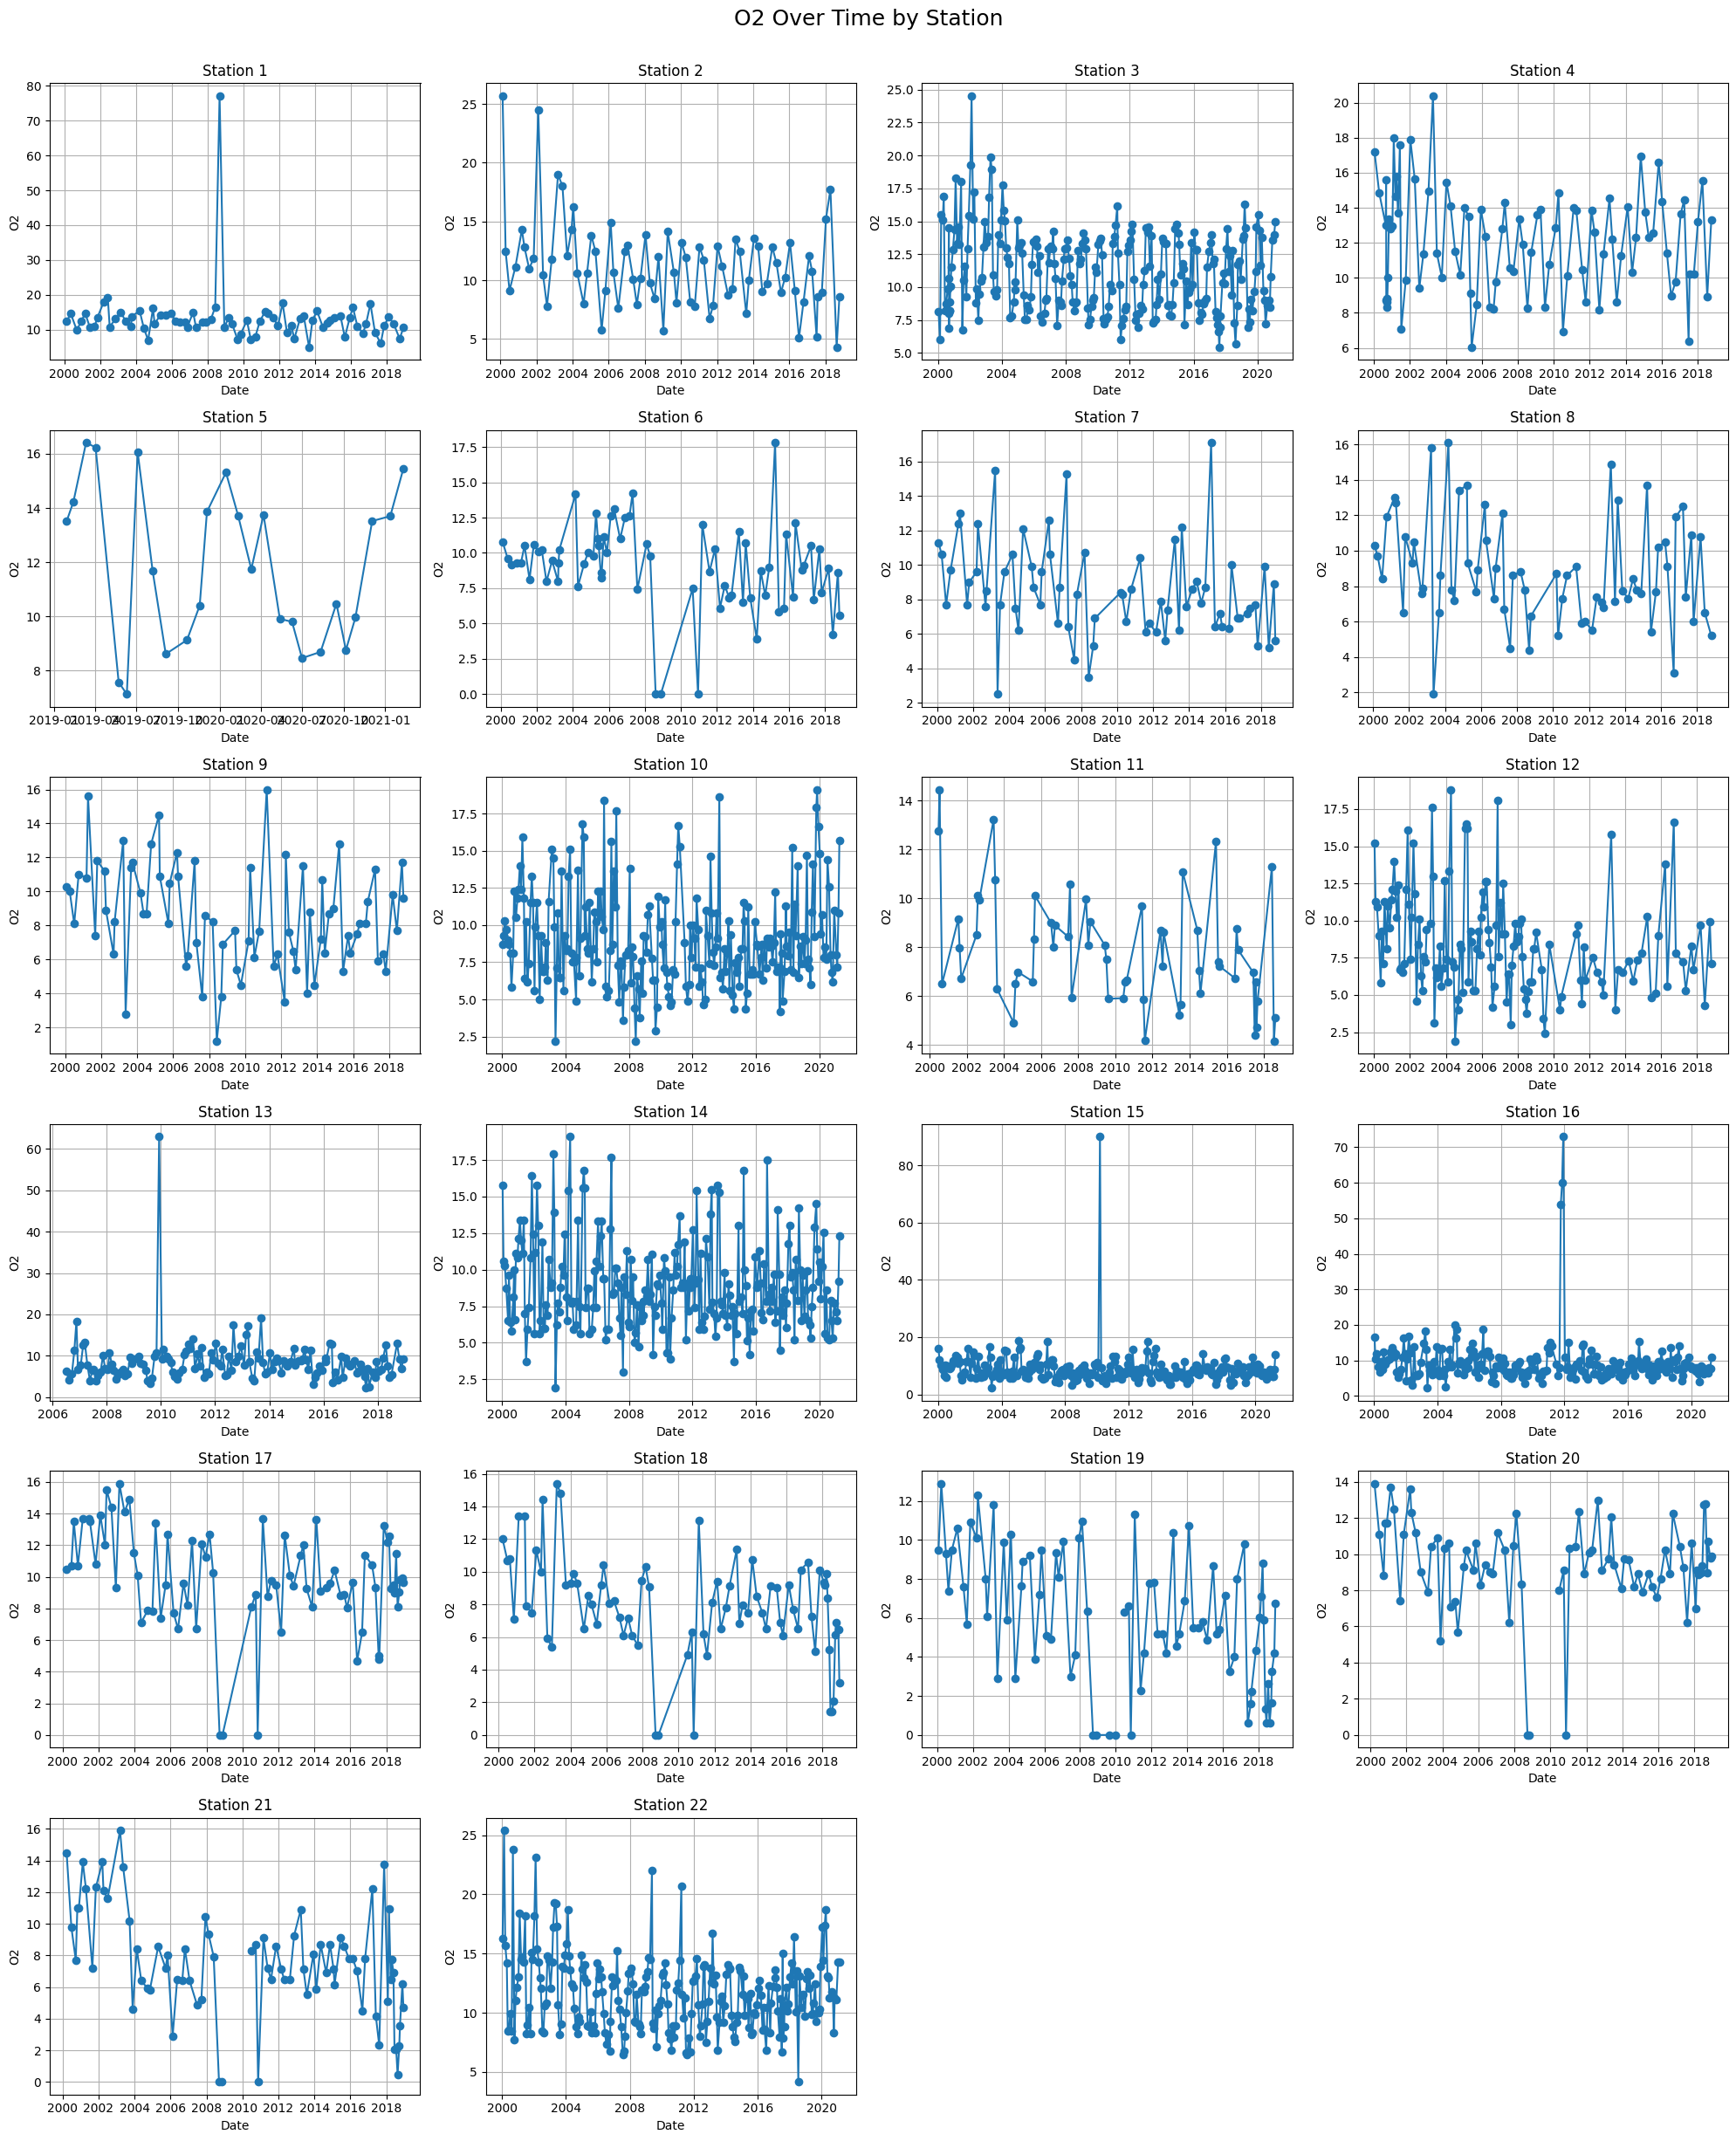

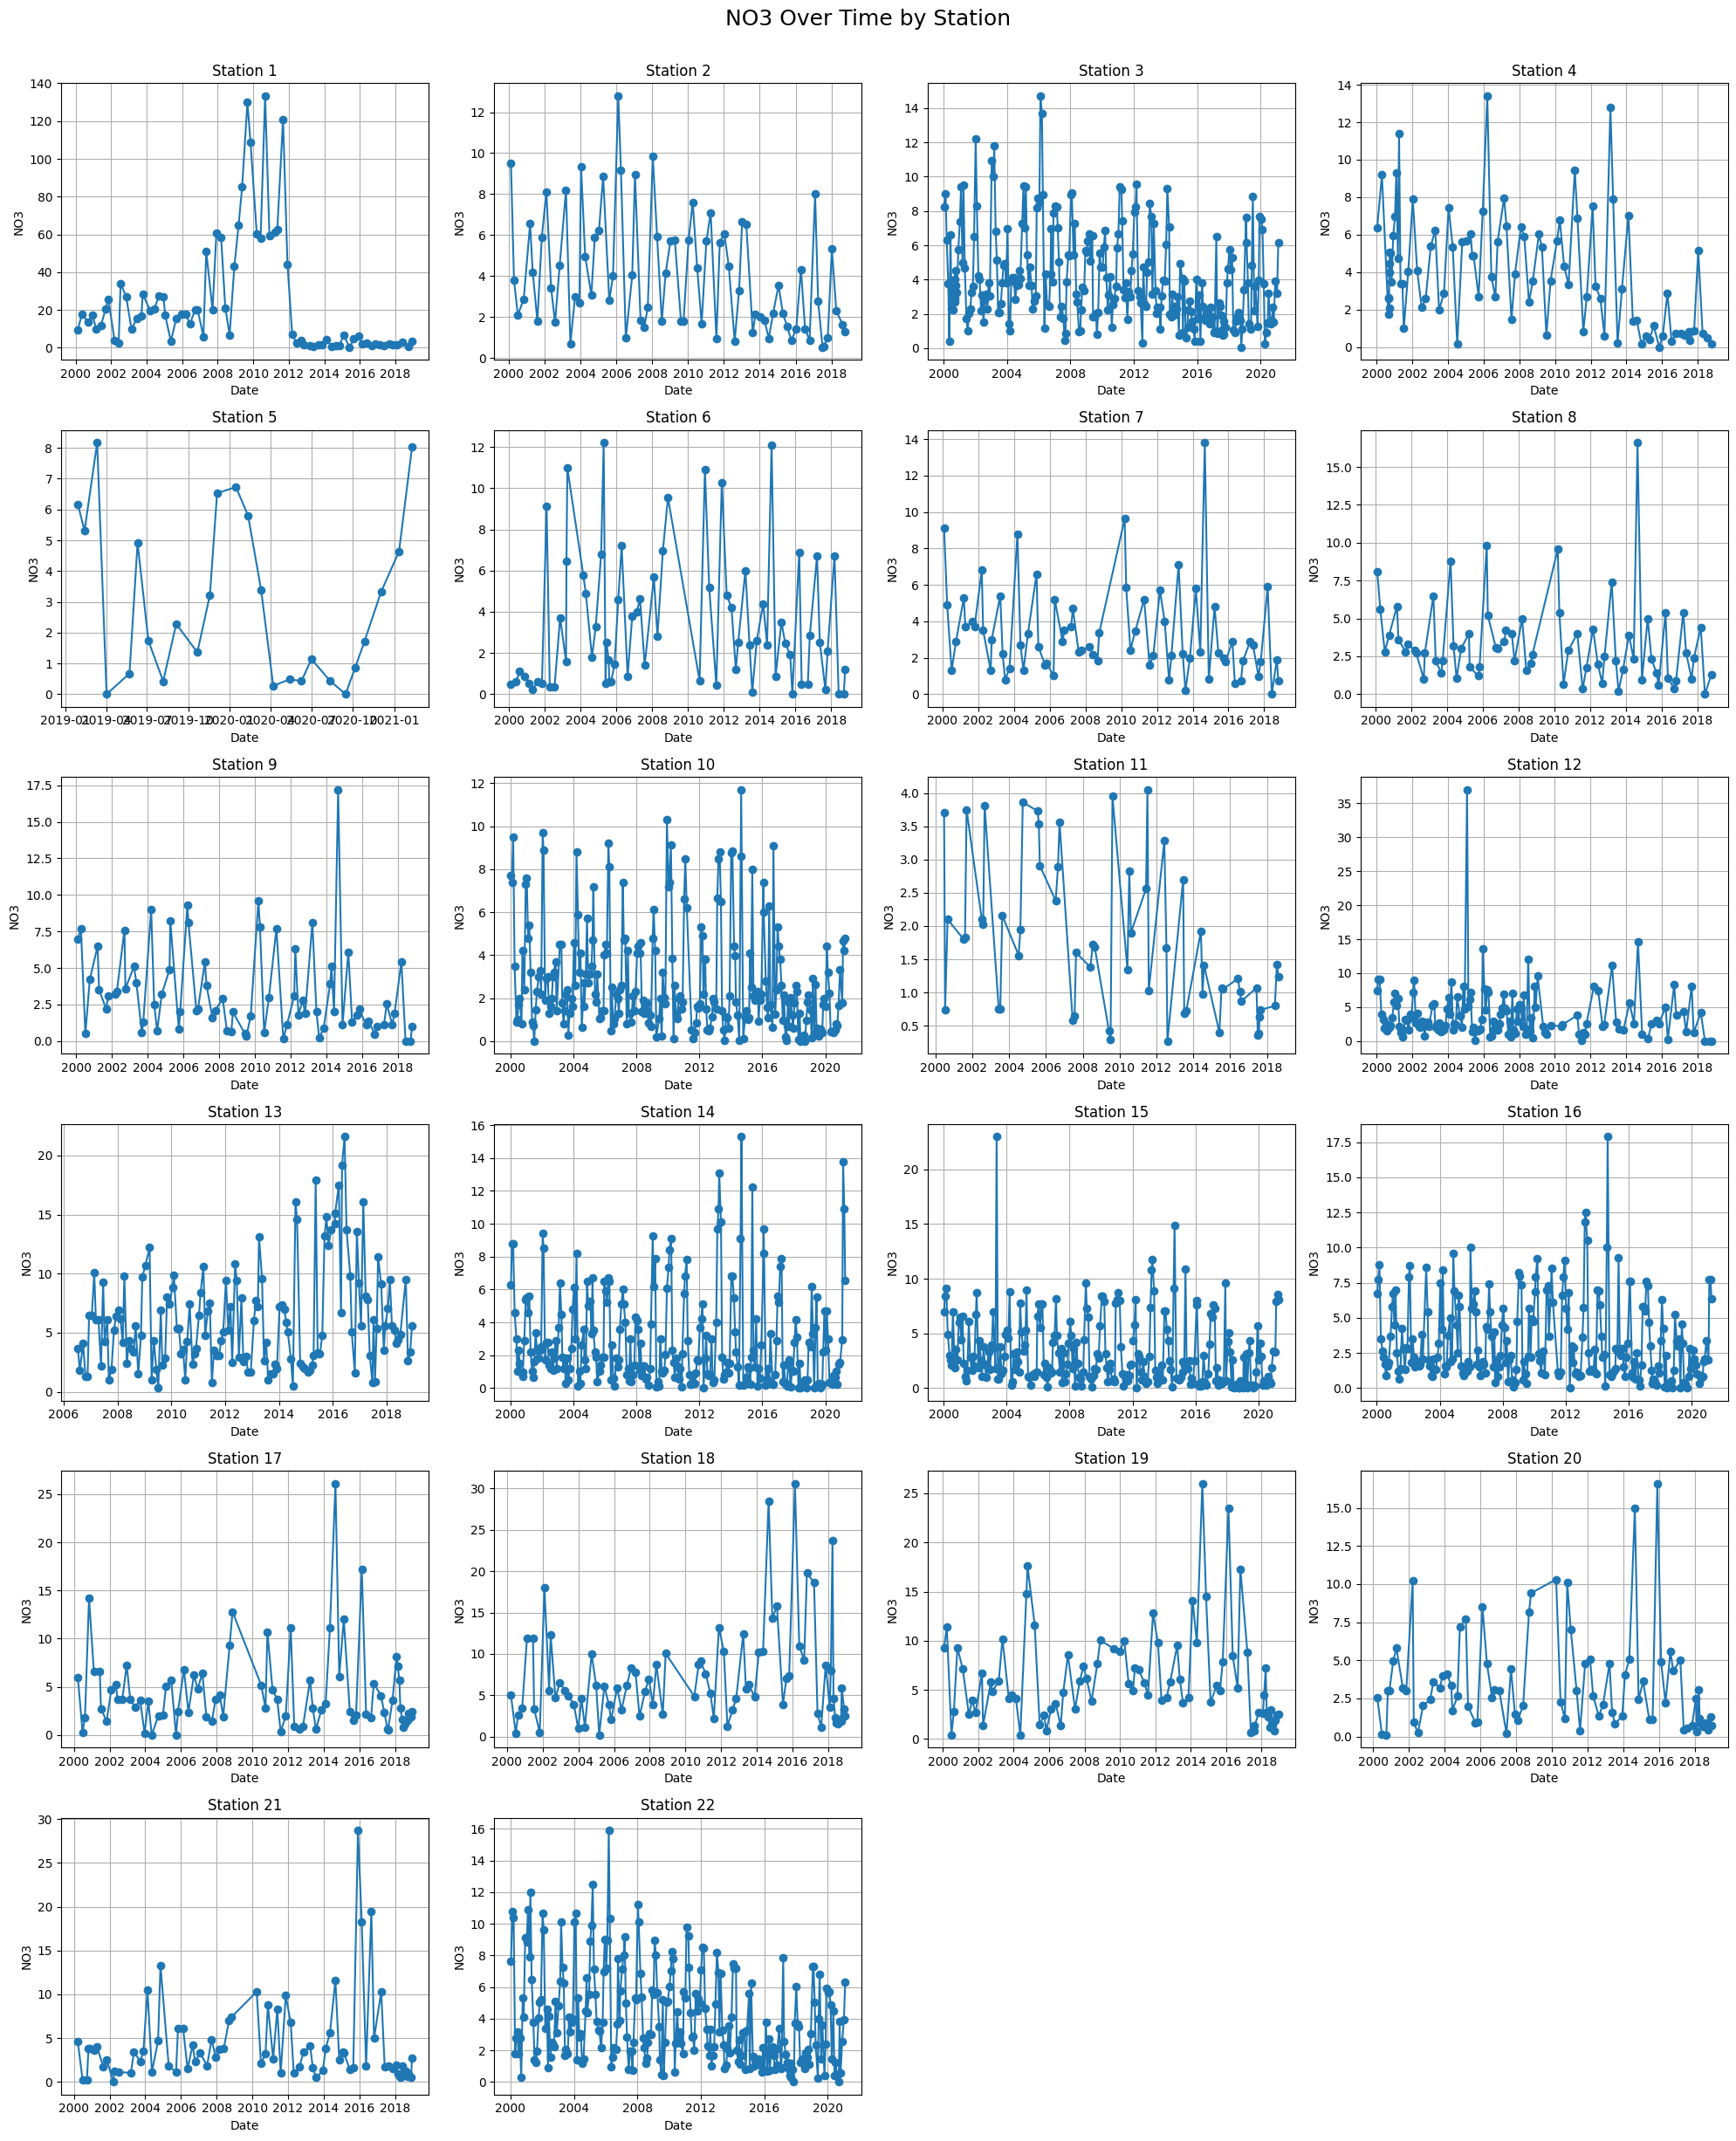

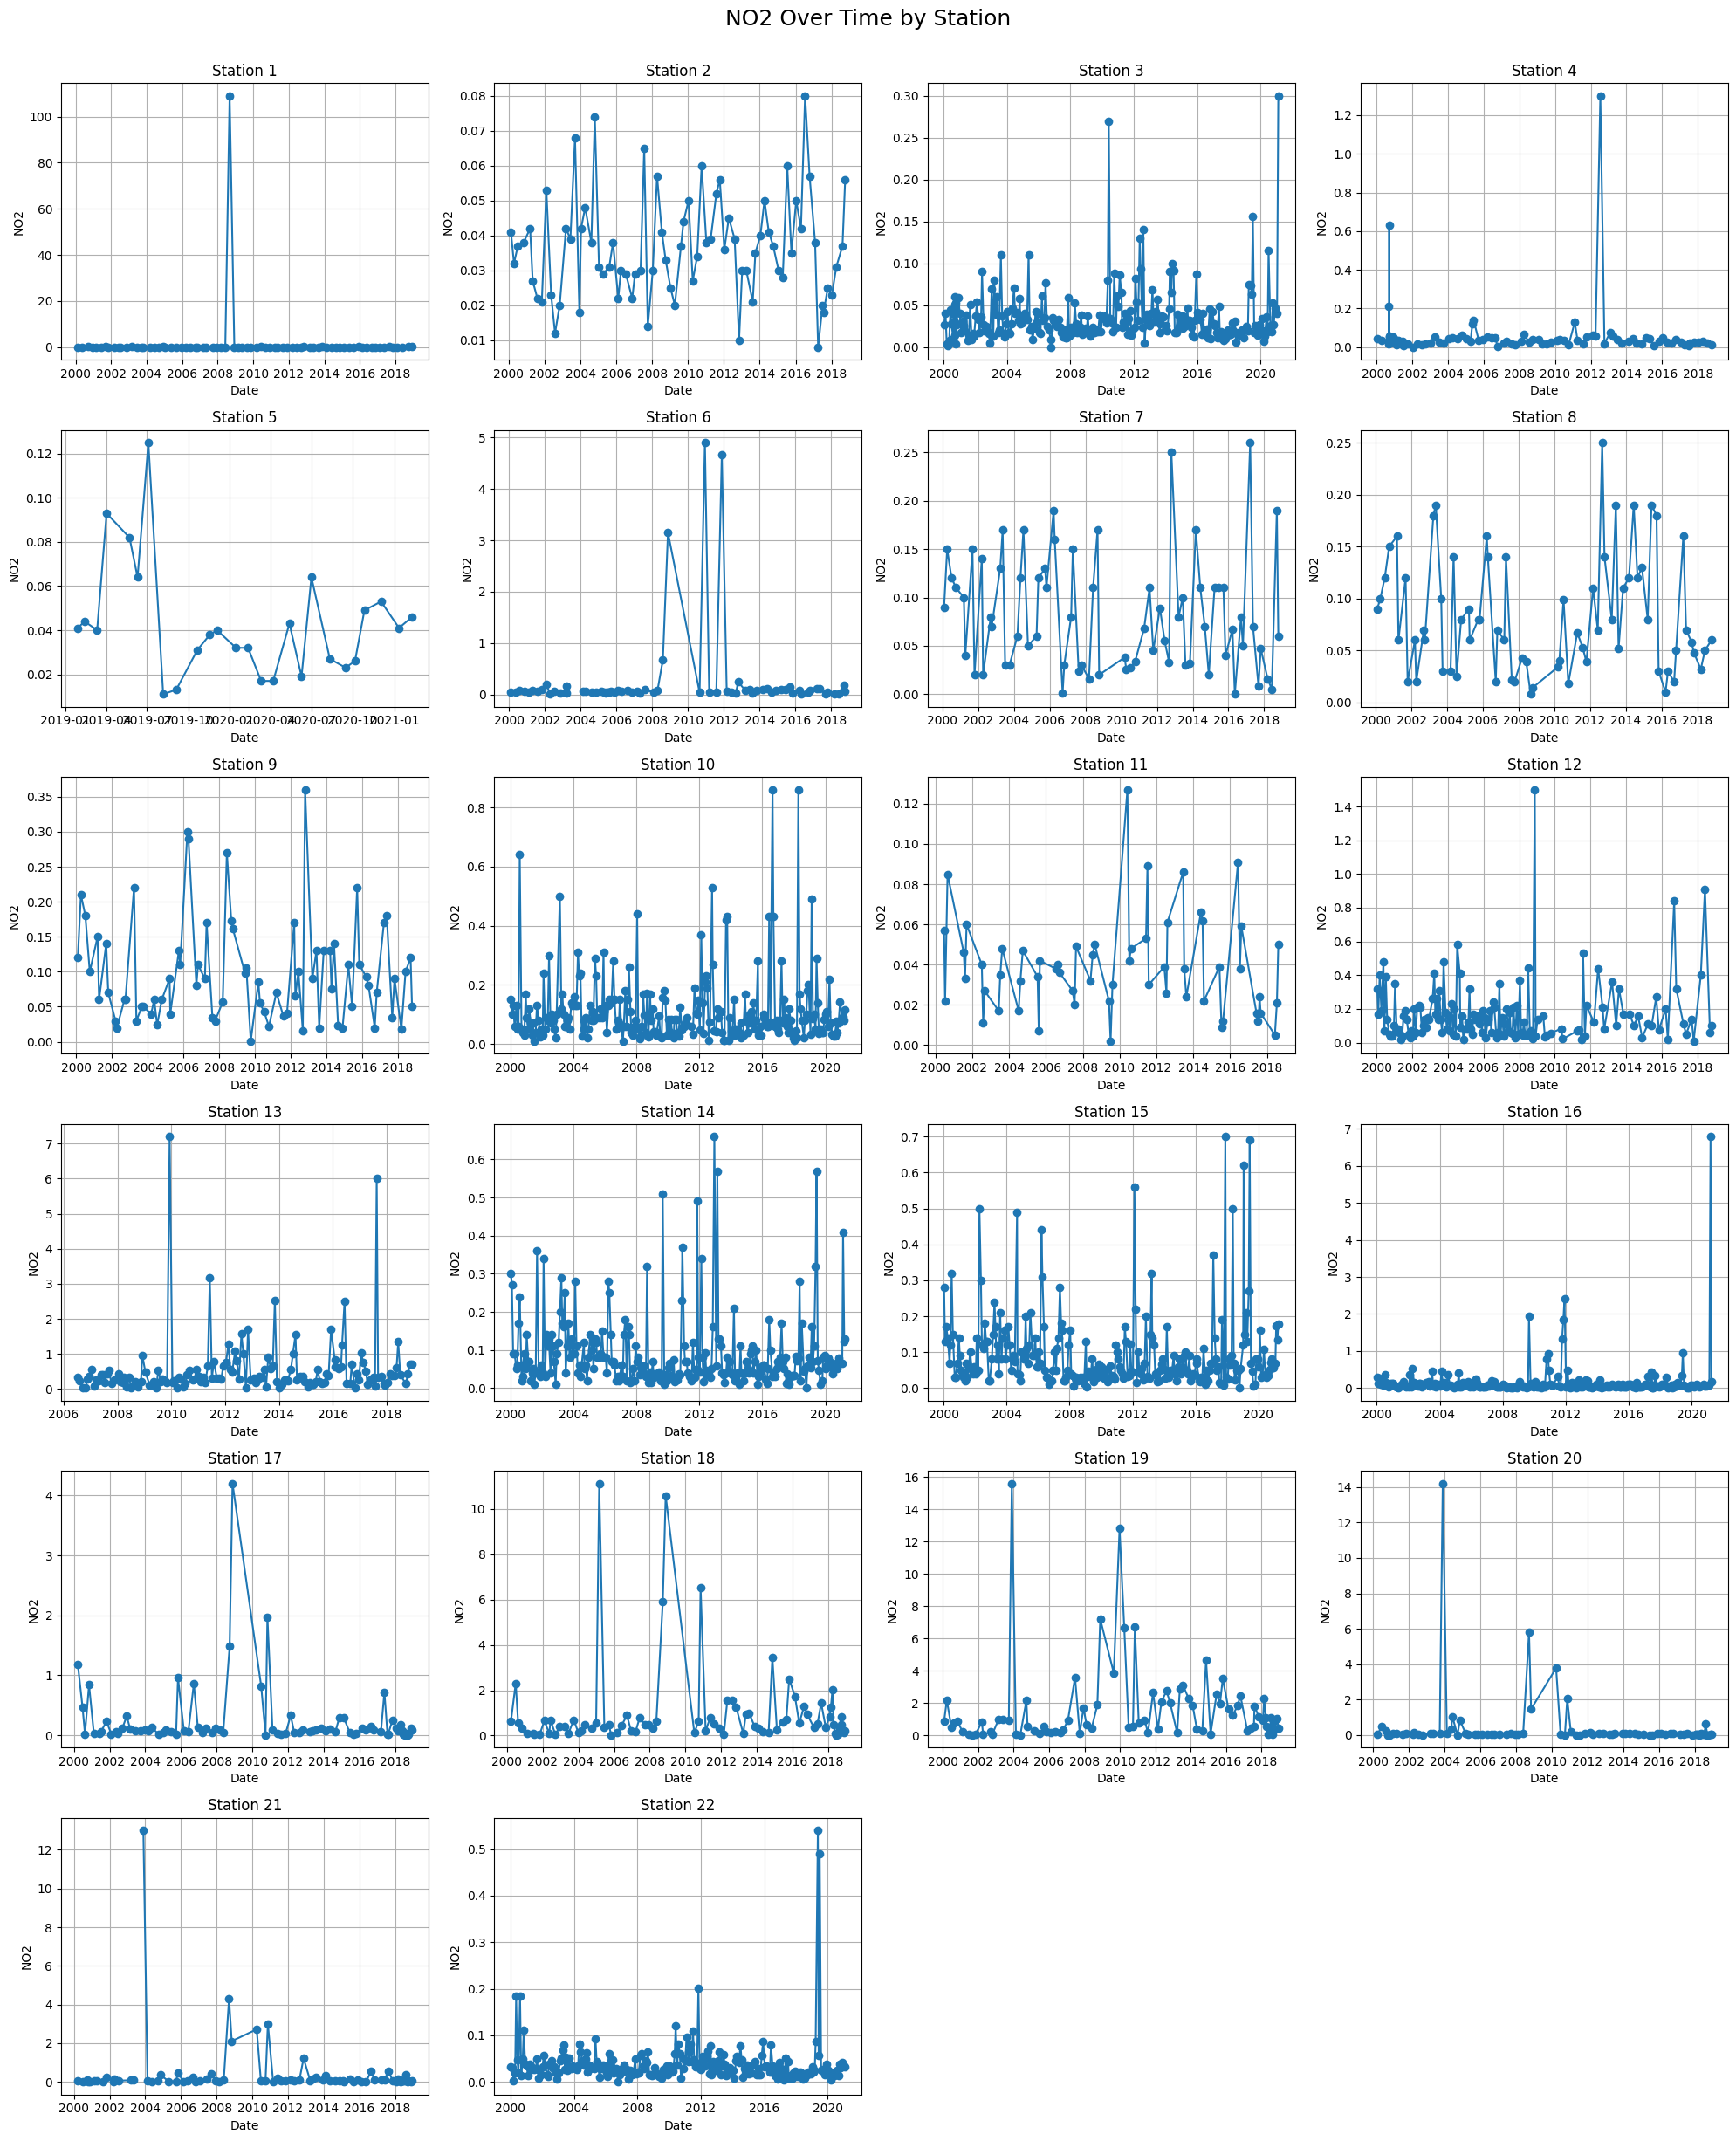

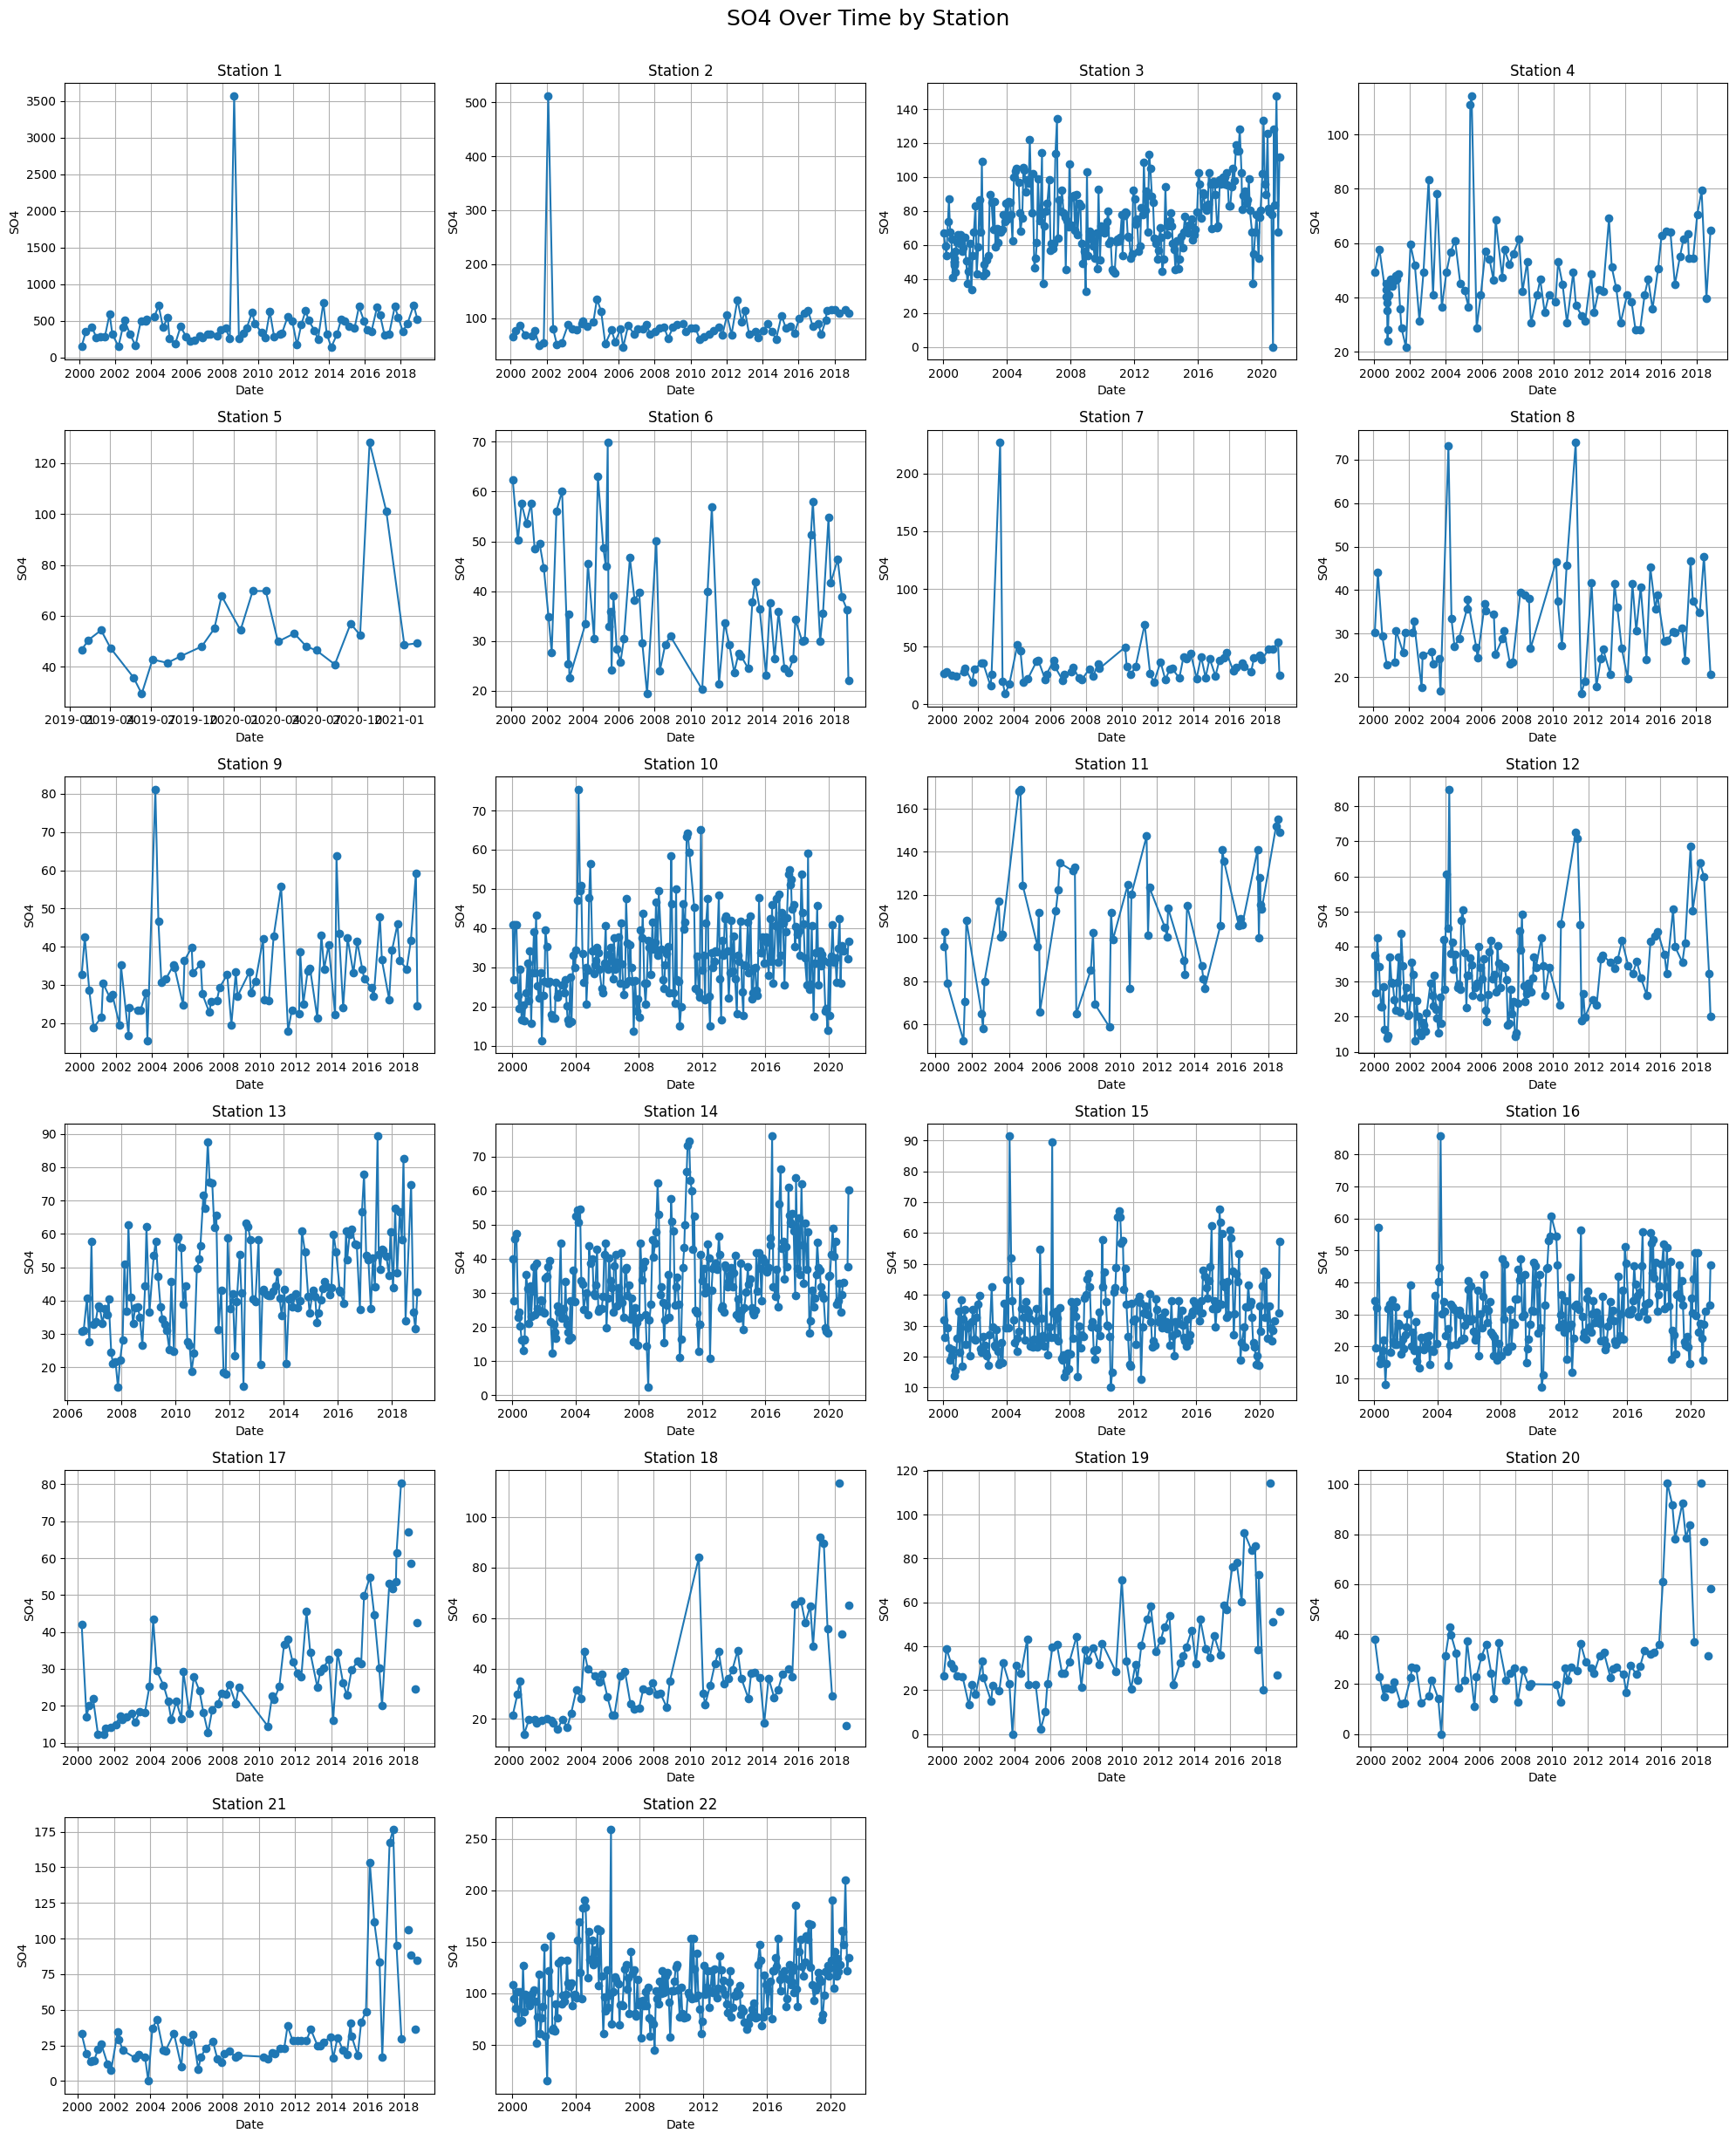

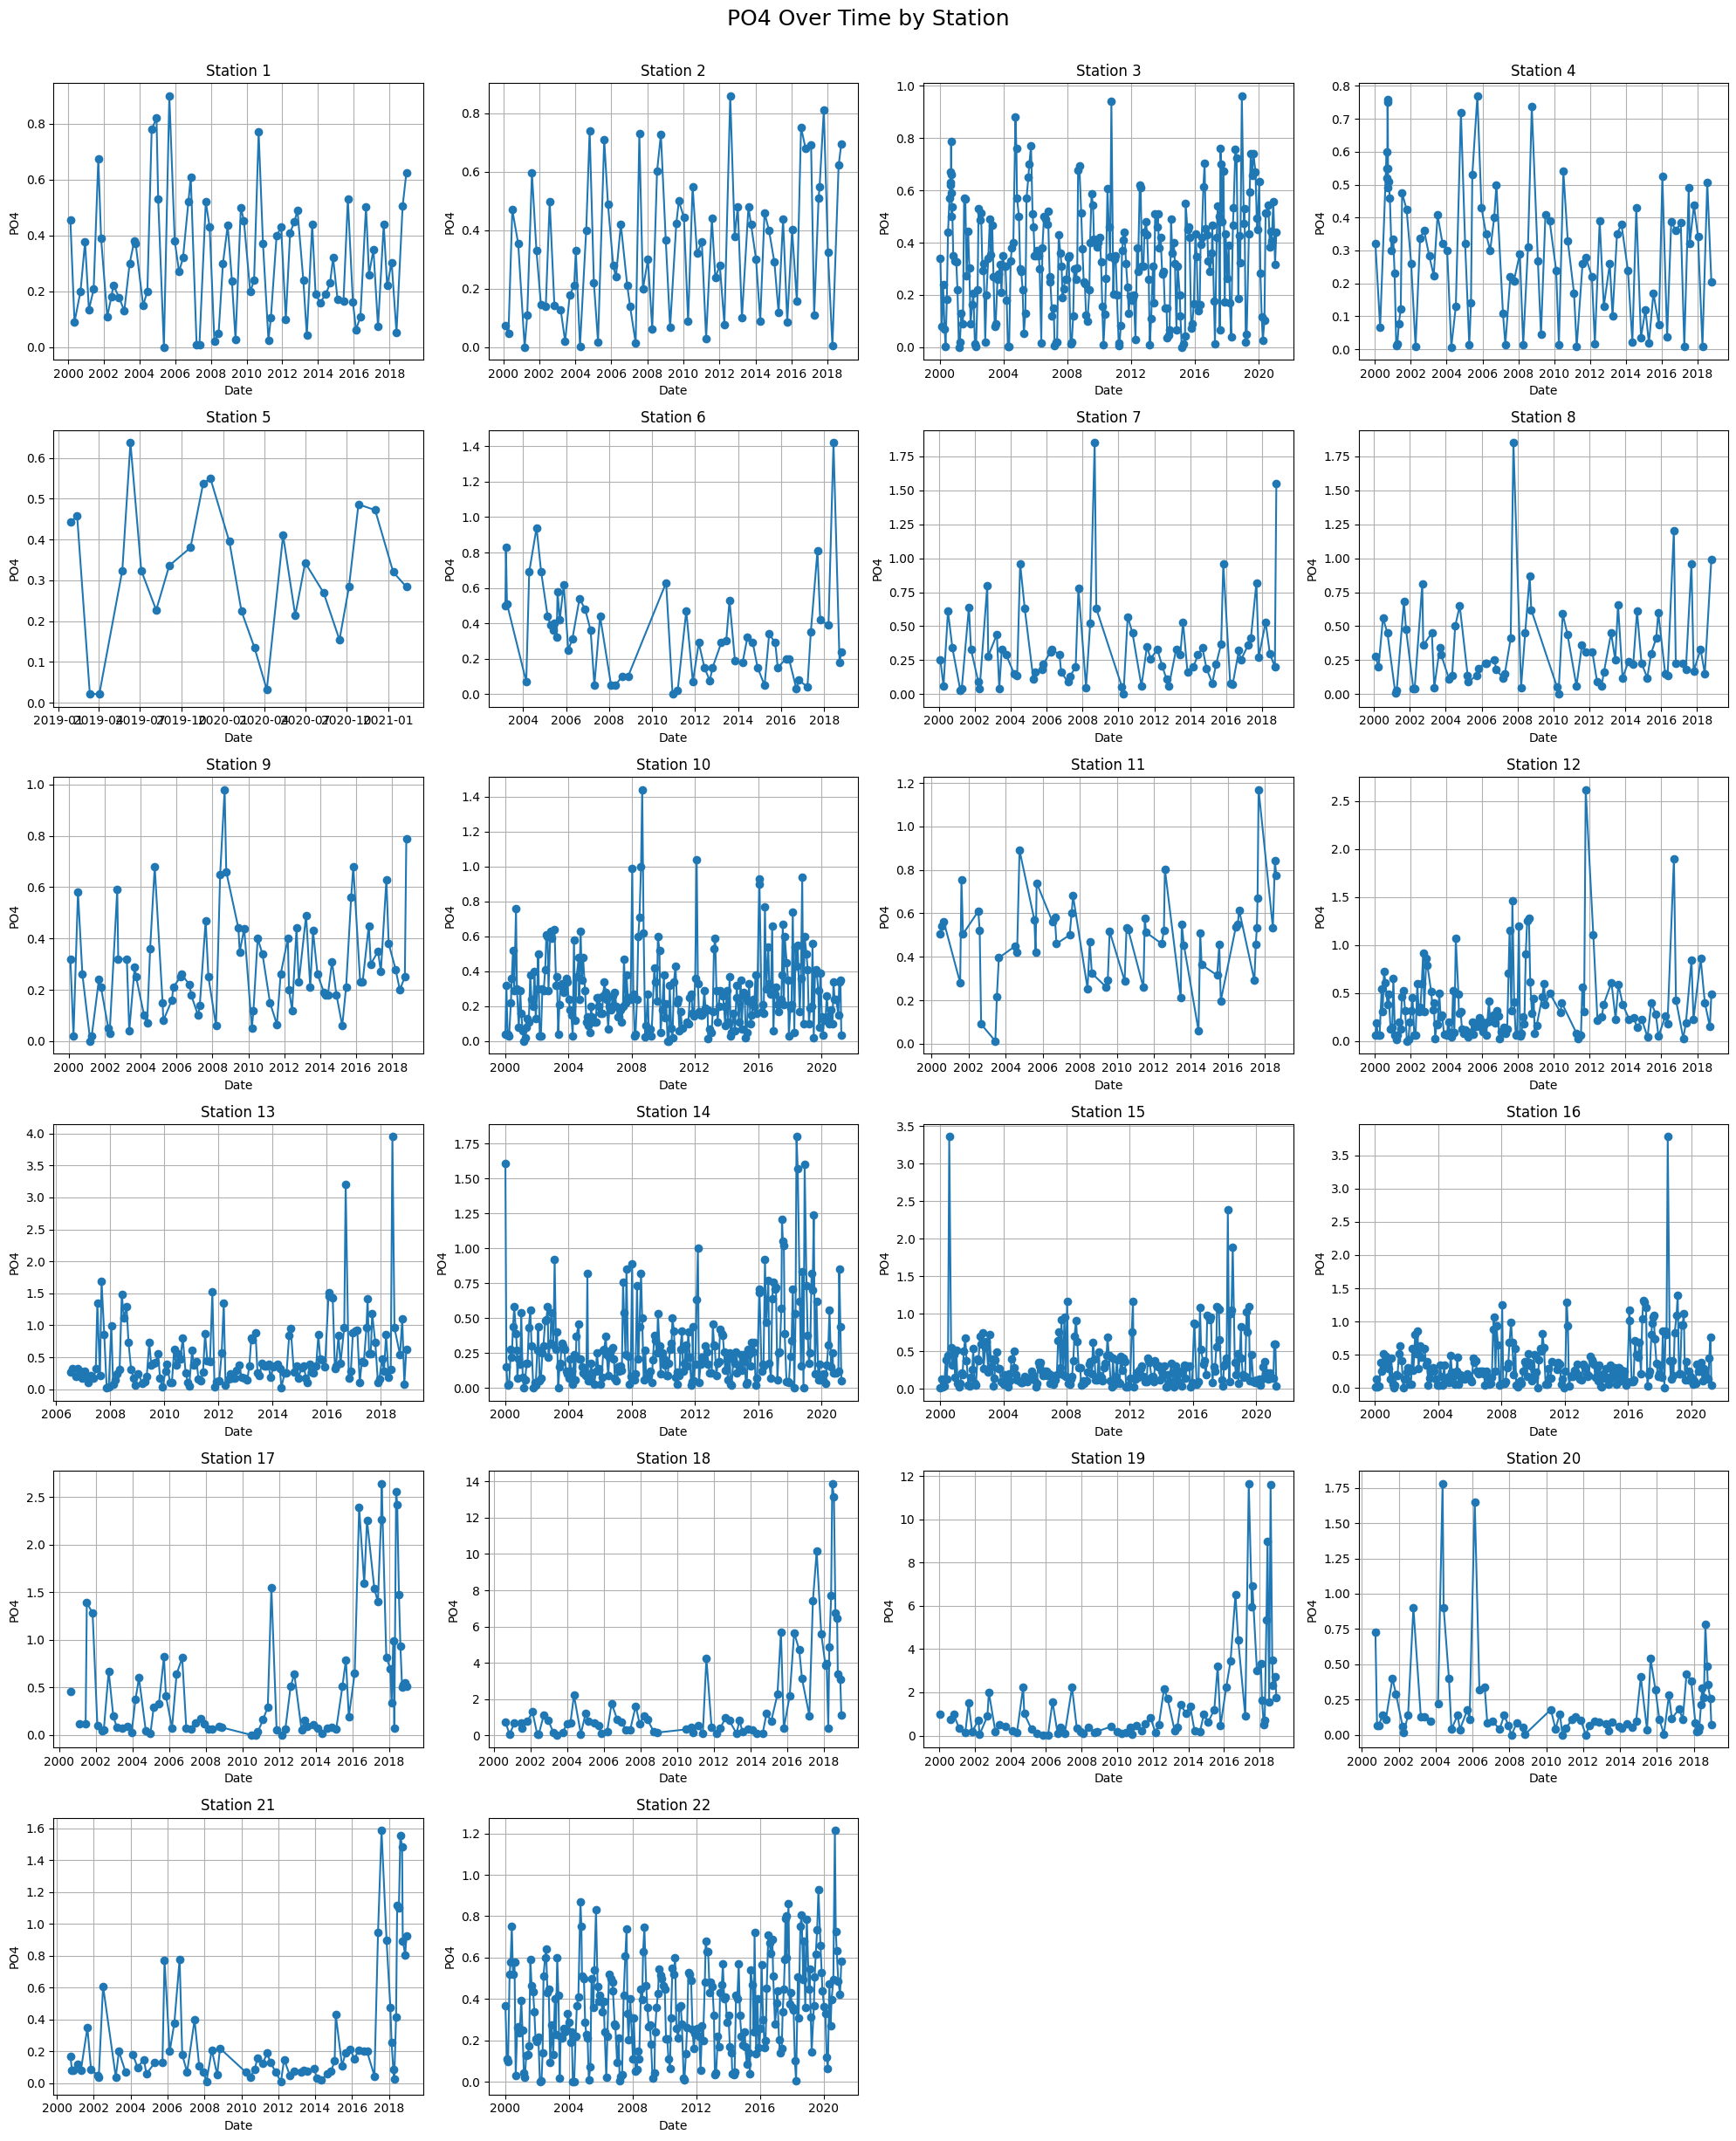

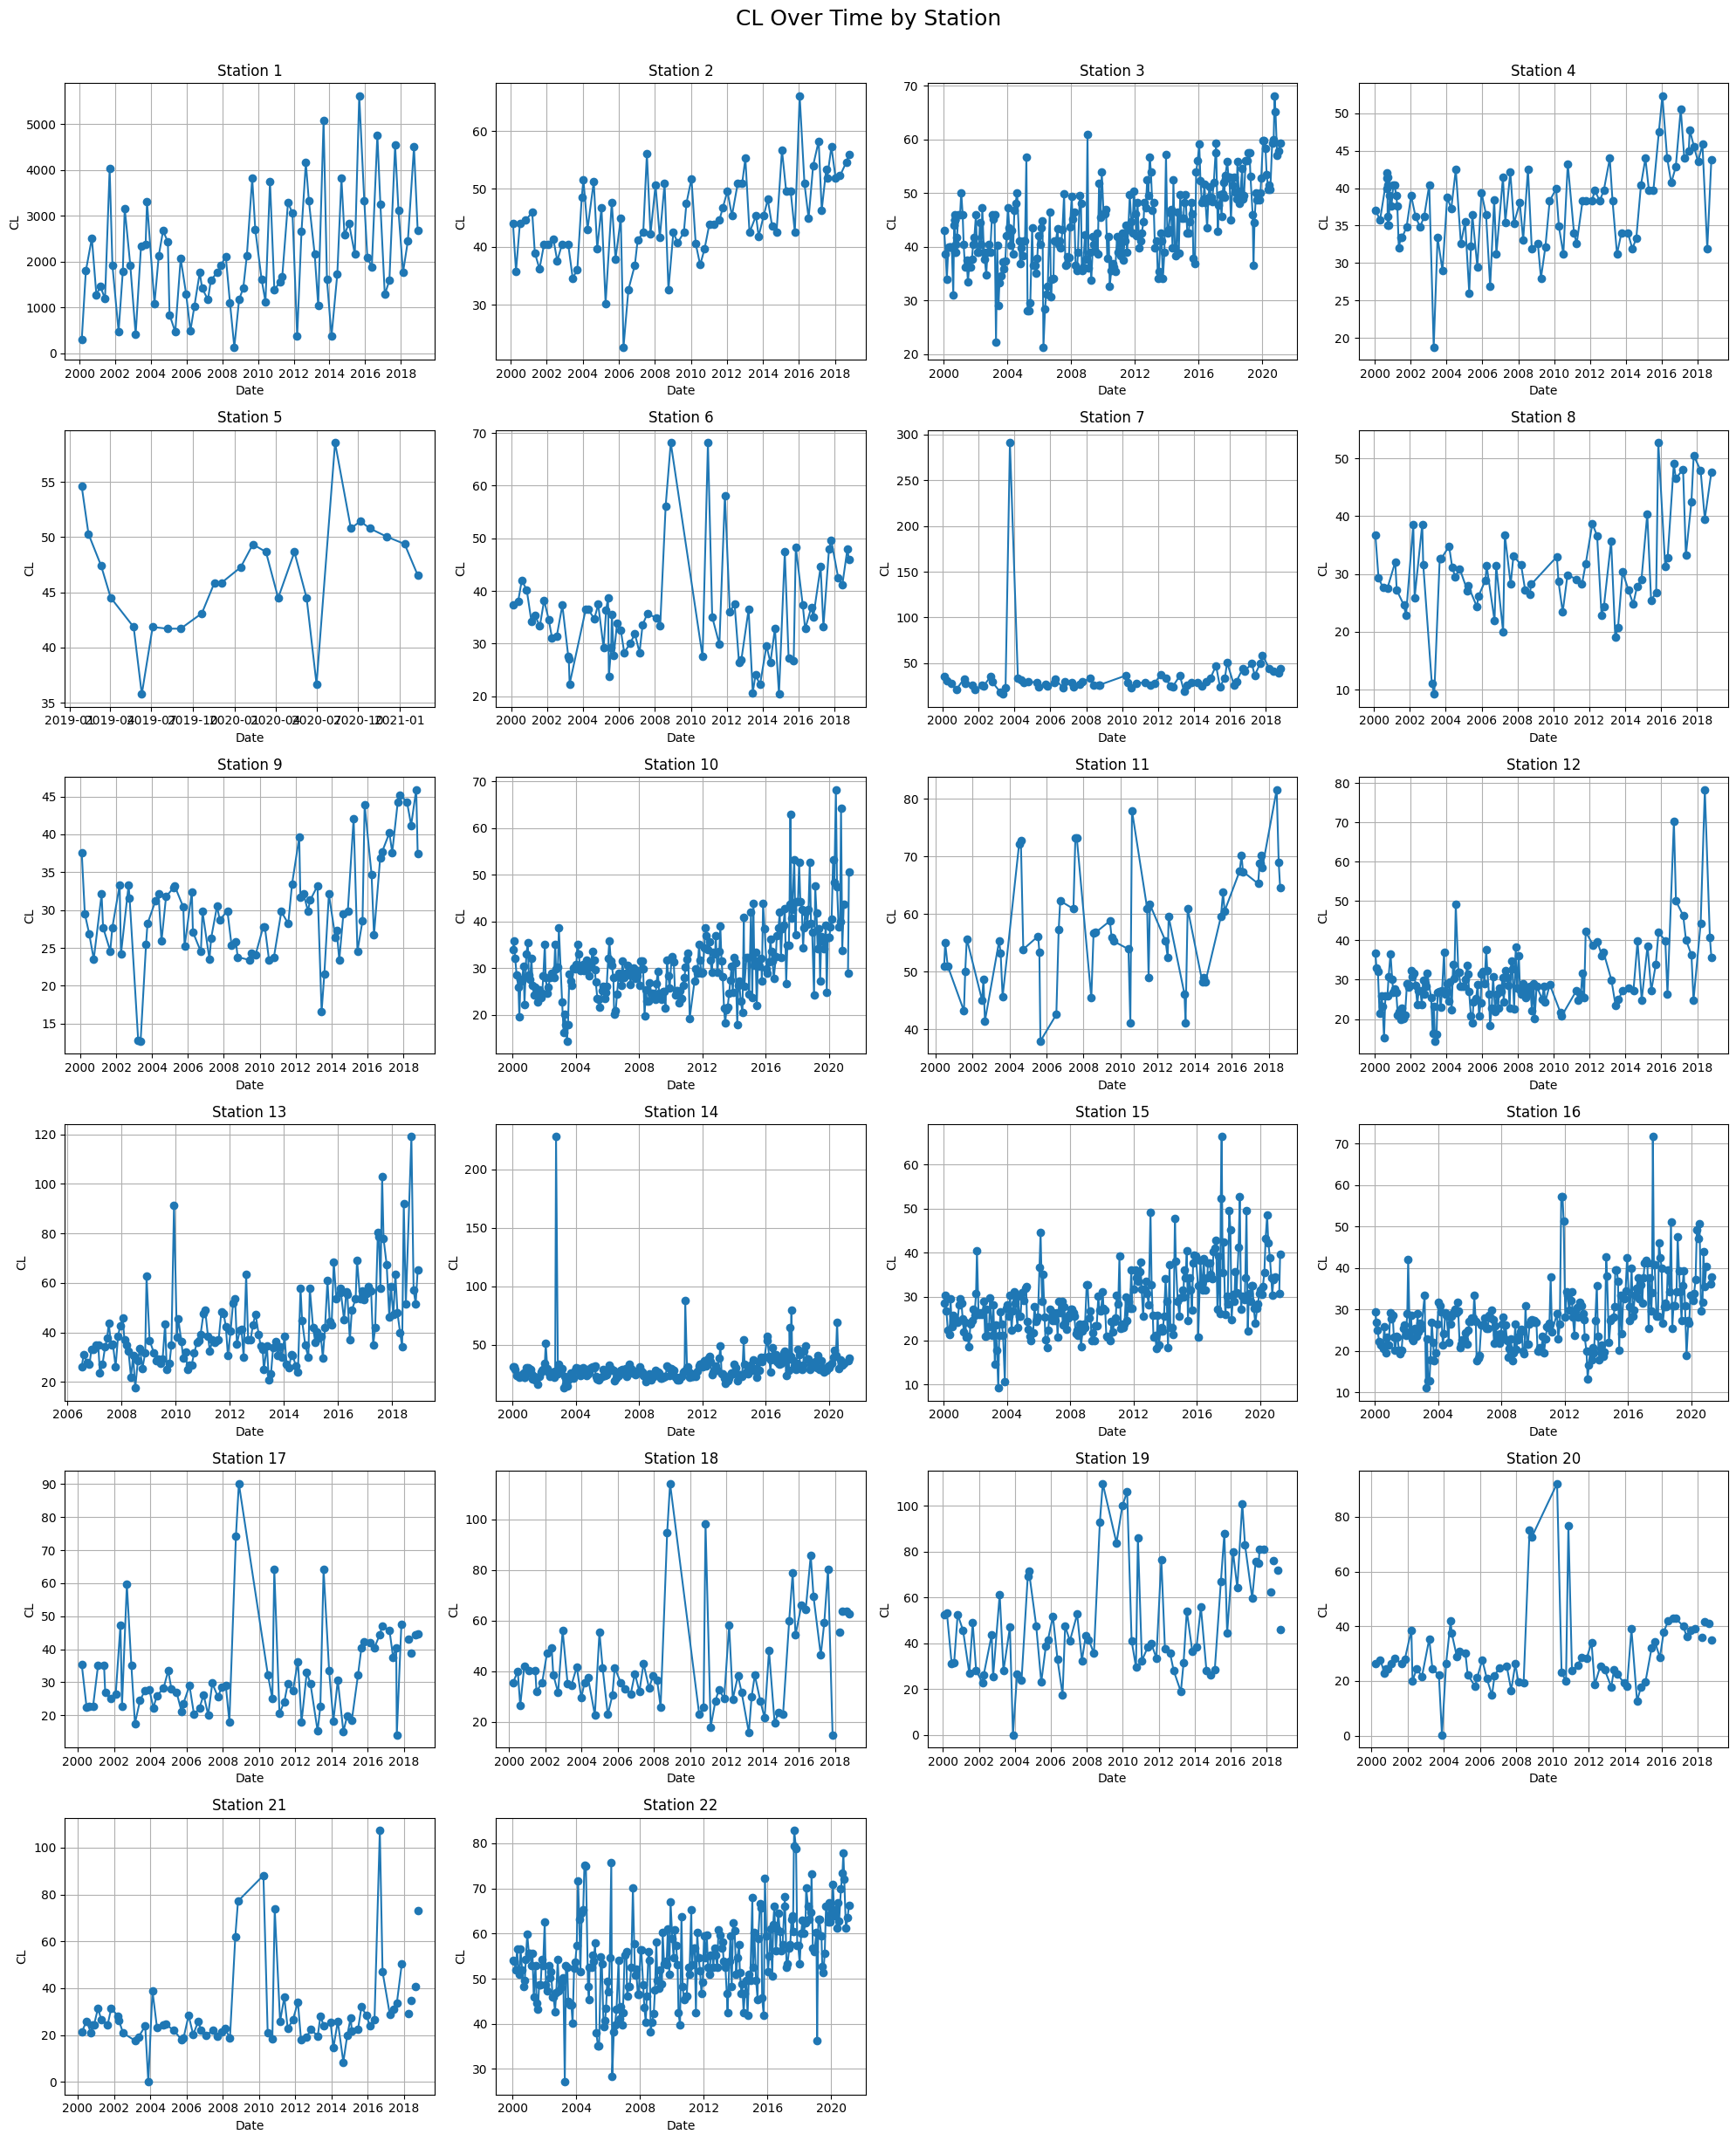

In [51]:
# there are 22 stations
cols = 4
rows = 6

for col in components:
  plt.figure(figsize=(5 * cols, 4 * rows))

  for i, station in enumerate(station_ids, 1):
    plt.subplot(rows, cols, i)
    station_df = df[df['id'] == station]
    plt.plot(station_df['date'], station_df[col], marker='o', linestyle='-')
    plt.title(f'Station {station}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.grid(True)

  plt.tight_layout()
  plt.suptitle(f'{col} Over Time by Station', fontsize=18, y=1.02)
  plt.show()